**순차데이터**
*순서에 중점을 두는 데이터를 **순차데이터**라고 함*
1. 텍스트 ( ex. I am a boy )
2. 시계열 ( ex. 1일 / 15도 )

- ex. 날씨 예측할 때 과거의 데이터(데이터)를 가지고 오늘의 날씨(정답)를 예측하는 것

# 순환 신경망 (RNN, Recurrent Neural Network)
### - 시계열 데이터와 같이 시간의 흐름에 따라 변화하는 데이터를 학습하기 위한 인공신경망
### -  따라서, 과거의 출력 데이터를 재귀적으로 참조함
### - 결과를 출력하기 전 한 번 더 자기 자신을 참조함
### - 순환 신경망에서는 'tanh(순환층)' 활성화 함수 사용
### ** sigmoid와 유사한 형태로, -1 ~ 1 사이의 값을 가짐 (sihmoid : 0 ~ 1)
### - 'tanh'는 부르는 명칭이 매우 다양하나, 정식 명칭은 하이볼릭 탄젠트...
### - 순환 신경망에서 데이터를 처리하는 한 단계를 '타입스탬프', 층을 '셀'이라고 부름
### - 타임스탬프 A에서 셀의 출력 0a가 사라지지 않고 다음 스탬프 B에서 셀의 출력 0b가 다시 타입스탬프 C의 셀로 주입됨
### - 이전 타임스텝은 잘 기억하지만 오래될수록 순환되는 정보가 희미해진다는 문제점이 있음

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**< IMDB 리뷰 데이터셋 >**

- 감성 분류를 연습하기 위해 자주 사용하는 영어 데이터로 영화 사이트 IMDB의 리뷰 데이터가 있습니다. 이 데이터는 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터입니다. 스탠포드 대학교에서 2011년에 낸 논문에서 이 데이터를 소개하였으며, 당시 논문에서는 이 데이터를 훈련 데이터와 테스트 데이터를 50:50대 비율로 분할하여 88.89%의 정확도를 얻었다고 소개하고 있습니다.



- 케라스에서는 해당 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 바로 다운로드 할 수 있도록 지원하고 있습니다. 해당 데이터를 학습하여 감성 분류를 수행하는 모델을 만들어보겠습니다.



- 케라스 데이터셋으로부터 imdb.data_load()를 통해 영화 리뷰 데이터를 로드합니다. IMDB 리뷰 데이터는 앞서 배운 로이터 뉴스 데이터에서 훈련 데이터와 테스트 데이터를 우리가 직접 비율을 조절했던 것과는 달리 이미 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공합니다. 로이터 뉴스 데이터에서 사용했던 test_split과 같은 데이터의 비율을 조절하는 인자는 imdb.load_data에서는 지원하지 않습니다.

In [2]:
# !pip install tensorflow

In [3]:
from tensorflow.keras.datasets import imdb # keras의 특징 : 데이터를 튜플 형태로 가져옴

In [4]:
(x_train_imdb, y_train_imdb), (x_target_imdb, y_target_imdb) = imdb.load_data(num_words=500)

In [6]:
x_train_imdb.shape, y_train_imdb.shape, x_target_imdb.shape, y_target_imdb.shape # 모두 1차원 데이터

((25000,), (25000,), (25000,), (25000,))

**영화 리뷰에 대한 데이터 50000개로 이루어져 있음 (훈련데이터 25000개, 검증데이터 25000개로 나누어짐)**

#### 토큰의 개수 확인하기 (토큰 : 문장에서 분리된 단어)
#### 하나의 토큰이 하나의 타임스탬프에 해당
#### Sentence : I love you        Token : 'I', 'love', 'you'

#### (한글의 경우)
#### 조사가 있어, 공백으로 분리가 안 됨 (공백으로 토큰화시킬 수 없음)
#### 형태소 분석을 통해 토큰을 분리해야 하고 이를 위한 라이브러리가 존재함

In [9]:
len(x_train_imdb[0]), len(x_train_imdb[1]) # 각각 하나의 샘플 출력

(218, 189)

In [10]:
import numpy as np
np.unique(y_train_imdb) # 정답데이터 ( 0 : 부정   1 : 긍정 )

array([0, 1], dtype=int64)

### **학습데이터와 훈련데이터 나누기 (8:2)**

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_target, y_train, y_target = train_test_split(x_train_imdb, y_train_imdb, test_size=0.2, random_state=42)

In [12]:
x_train.shape, y_train.shape

((20000,), (20000,))

In [13]:
# 넘파이 배열에 담기 (수행속도를 높이기 위함)
# np.array([len(x_train[0]), len(x_train[1])])

In [14]:
lengths = [len(i) for i in x_train]

#### 히스토그램 (Histogram)은 도수분포표를 그래프로 나타낸 것으로서, 가로축은 계급, 세로축은 도수 (횟수나 개수 등)를 나타냄
#### matplotlib.pyplot 모듈의 hist() 함수를 이용해서 다양한 히스토그램을 그릴 수 있음

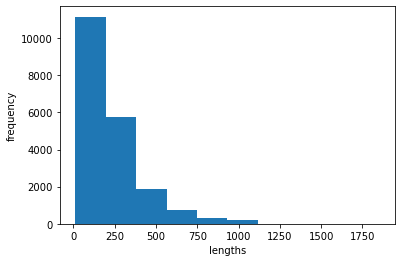

In [15]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()
# 리뷰의 길이는 짧고 간단할 것을 보여줌

### < 데이터 100개 정도를 사용하여 순환 신경망 모델 만들어보기 >
**데이터가 텍스트이기 때문에 조금 다르게 분류해 주어야 함**

**pad_sequence() --> 시퀀스 데이터의 길이를 맞춤**

**(데이터의 범위가 서로 다르면, 즉 큰 데이터에는 가중치가 많이 몰리게 되므로 스케일링을 해주듯이 문자의 길이를 맞추어주는 것)**

**짧은 글자는 0으로 채워주고 긴 글자는 잘라내기 해 줌**

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
pad_sequences(x_train, maxlen=100) # 최대 토큰의 개수를 100으로 맞춰 줌

array([[ 10,   4,  20, ...,  10, 470, 158],
       [206,   2,  26, ...,   6,   2,   2],
       [  2,   7,   2, ...,   2,   2,  12],
       ...,
       [  2,  37, 299, ...,   7,  14,   2],
       [  0,   0,   0, ...,  25, 170,   2],
       [  0,   0,   0, ...,  25, 194,   2]])

In [18]:
x_train_seq = pad_sequences(x_train, maxlen=100)
x_target_seq = pad_sequences(x_target, maxlen=100)

In [19]:
x_train_seq.shape, x_target_seq.shape # 20000개의 토큰이 100개의 토큰으로 통일되어 2차원 형태로 변환됨

((20000, 100), (5000, 100))

In [20]:
len(x_train_seq[0]) # 100개의 토큰으로 통일됨

100

### keras에서 제공하는 순환 신경망 알고리즘 중

### 가장 간단한 SimpleRNN 클래스 사용해보기

**
        
- 이진분류...뉴런의 출력층은 단 1개 (sigmoid)


- 다중분류...뉴런의 출력층 여러 개 (softmax)


- simpleRNN에서 매개변수 지정 시 input_shape(100, 500) 을 주로 사용

    *(샘플의 길이, 빈도수가 높은 토큰[단어]의 개수)*
    
    

- RNN은 이전 결과를 가지고 다음 결과를 예측할 때 사용


- RNN은 오래된 정보까지도 이전 결과로 가져와 사용하여 희석시키기 때문에 성능이 상황에 따라 달라짐 (단점)


- 원핫인코딩으로 빈도수가 높은 단어의 개수 처리하기


- 원핫인코딩... 정답에 영향을 미치지 않기 위해 사용 (0과 1의 조합으로 정답을 맞춤)


- 토큰을 정수로 변환한 데이터를 신경망에 주입...이 데이터들은 단순히 숫자로 변환한 것에 불과하기 때문에 숫자가 큰 데이터들이 중요하다고 판단되어 가중치가 몰리는 등의 문제를 방지하기 위해 숫자 사이의 관계를 없애기 위해 원핫인코딩 사용


In [21]:
from tensorflow import keras
model = keras.Sequential()

# 층 생성하기
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 심플RNN 바로 사용
model.add(keras.layers.Dense(1, activation='sigmoid')) # 이진 분류 (1개의 출력층)

In [22]:
x_train_seq.shape

(20000, 100)

In [23]:
print(x_train_seq[0])
x_train_oh = keras.utils.to_categorical(x_train_seq)
print(x_train_oh[:2])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]]


In [24]:
x_target_oh = keras.utils.to_categorical(x_target_seq)

In [25]:
x_train_oh.shape, x_target_oh.shape

((20000, 100, 500), (5000, 100, 500))

In [26]:
x_train_oh[0][0][:12] # 12개의 원소 중 11번째 원소 (원핫인코딩을 해 주었기 때문에 1이 하나만 있어야 함)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [27]:
# np.sum으로 확인
np.sum(x_train_oh[1][0])

1.0

In [28]:
# 모델 다시 생성
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# 위 세 코드가 없으면 훈련 반복 수가 계속 누적됨

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# Default : learnin_rate : 0.1     (learning_rate=1e-4 : 0.0001)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')

checkpointCB = keras.callbacks.ModelCheckpoint('best-simplernn.h5')
earlystoppingCB = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(x_train_oh, y_train, epochs=50, batch_size=63, validation_data=(x_target_oh, y_target),
          callbacks=[checkpointCB, earlystoppingCB])

Epoch 1/50
318/318 [==============================] - 43s 125ms/step - loss: 0.6967 - accuracy: 0.5077 - val_loss: 0.6945 - val_accuracy: 0.5082
Epoch 2/50
318/318 [==============================] - 36s 114ms/step - loss: 0.6867 - accuracy: 0.5475 - val_loss: 0.6797 - val_accuracy: 0.5852
Epoch 3/50
318/318 [==============================] - 40s 126ms/step - loss: 0.6707 - accuracy: 0.6091 - val_loss: 0.6652 - val_accuracy: 0.6238
Epoch 4/50
318/318 [==============================] - 39s 121ms/step - loss: 0.6546 - accuracy: 0.6467 - val_loss: 0.6507 - val_accuracy: 0.6490
Epoch 5/50
318/318 [==============================] - 36s 114ms/step - loss: 0.6379 - accuracy: 0.6770 - val_loss: 0.6354 - val_accuracy: 0.6744
Epoch 6/50
318/318 [==============================] - 40s 125ms/step - loss: 0.6223 - accuracy: 0.6966 - val_loss: 0.6236 - val_accuracy: 0.6836
Epoch 7/50
318/318 [==============================] - 38s 119ms/step - loss: 0.6052 - accuracy: 0.7146 - val_loss: 0.6054 - val_ac

C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: 

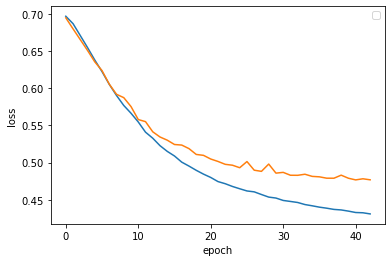

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'target')
plt.show()

In [30]:
## 지금까지의 훈련 상황...
### 주요 단어 500개를 가져와
### 토큰의 수를 100개로 한정
### 토큰 자체가 숫자로 이루어진 값이기 때문에 변환해 주어야 함 (X --> 숫자가 높으면 가중치 과대적용)
### 문자를 이루어진 데이터는 주로 원핫인코딩... / 숫자로 이루어진 데이터는 주로 StandardScaler

### 단, 원핫인코딩의 단점 --> 토큰 1개가 500차원으로 늘어남... 결국 데이터가 매우 커져버림

In [31]:
# Word Embedding
# - 실수로 된 고정된 크기의 벡터로 표현 (ex. 모든 데이터를 10개의 벡터로 표현)
# - 원핫인코딩에 비해 의미값을 더 많이 사용

In [35]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 빈도수가 높은 단어의 개수 = 500개로 한정,   Embedding vector의 크기(하이퍼 파라미터),   input_length = 토큰의 개수
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4) # 0.0001
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpointCB = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
earlystoppingCB = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model2.fit(x_train_seq, y_train, epochs=20, batch_size=63, validation_data=(x_target_seq, y_target),
          callbacks=[checkpointCB, earlystoppingCB])

Epoch 1/20
318/318 [==============================] - 14s 33ms/step - loss: 0.6954 - accuracy: 0.5016 - val_loss: 0.6939 - val_accuracy: 0.5138
Epoch 2/20
318/318 [==============================] - 9s 29ms/step - loss: 0.6910 - accuracy: 0.5212 - val_loss: 0.6913 - val_accuracy: 0.5240
Epoch 3/20
318/318 [==============================] - 10s 31ms/step - loss: 0.6876 - accuracy: 0.5439 - val_loss: 0.6900 - val_accuracy: 0.5250
Epoch 4/20
318/318 [==============================] - 10s 32ms/step - loss: 0.6840 - accuracy: 0.5606 - val_loss: 0.6891 - val_accuracy: 0.5314
Epoch 5/20
318/318 [==============================] - 9s 27ms/step - loss: 0.6776 - accuracy: 0.5876 - val_loss: 0.6792 - val_accuracy: 0.5814
Epoch 6/20
318/318 [==============================] - 8s 26ms/step - loss: 0.6619 - accuracy: 0.6464 - val_loss: 0.6619 - val_accuracy: 0.6424
Epoch 7/20
318/318 [==============================] - 8s 27ms/step - loss: 0.6419 - accuracy: 0.6935 - val_loss: 0.6444 - val_accuracy: 0.6

C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_17404/224809718.py:5: UserWarning: 

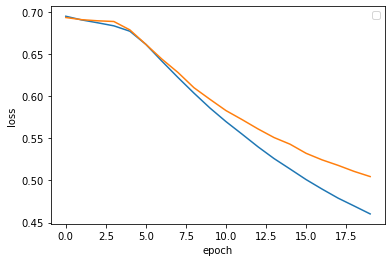

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'target')
plt.show()

### <위 과정 응용해보기>
#### 댓글을 분석하여 긍정과 부정으로 분류한 후 중고나라의 같은 제품의 어떤 가격이 적절한지 판단해 보기